In [6]:
# Import libraries
import pandas as pd
import numpy as np
import geopy
from geopy.geocoders import Nominatim
import geopandas as gpd
from shapely.geometry import Point

In [30]:
# Read in airbnbs data (https://insideairbnb.com/get-the-data/) for Toronto 2023 December
df1 = pd.read_csv(r'D:\Documents\Data Analyst Portfolio Workspace\6-Airbnbs\raw-toronto\listings.csv')
df2 = pd.read_csv(r'D:\Documents\Data Analyst Portfolio Workspace\6-Airbnbs\raw-toronto\reviews.csv')
df3 = pd.read_csv(r'D:\Documents\Data Analyst Portfolio Workspace\6-Airbnbs\raw-toronto\calendar.csv')


C:\Users\vietv\AppData\Local\Temp\ipykernel_7456\2327622341.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv(r'D:\Documents\Data Analyst Portfolio Workspace\6-Airbnbs\raw-toronto\calendar.csv')


In [36]:
# Count the number of listings for each host
host_listing_count = df1.groupby('host_id')['id'].count().reset_index()
host_listing_count = host_listing_count.rename(columns={'id': 'number_of_listings'})

df1 = pd.merge(df1, host_listing_count, on='host_id', how='left')

df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,number_of_listings_x,number_of_listings_y
0,119441,STYLISH LAKEVIEW / KING SIZE BED/DOWNTOWN+PAR...,174063,Denis,NaN,South Parkdale,43.63737,-79.44022,Entire home/apt,126.0,28,85,2024-10-22,0.52,4,363,3,NaN,4,4
1,131401,Waterfront Luxury Suite 1 Bd - Downtown,604233,Fuaad,NaN,Niagara,43.63649,-79.40171,Entire home/apt,78.0,150,11,2023-05-17,0.10,1,319,0,NaN,1,1
2,1348067,The Great Gerrard - Toronto Suite,377846,Nick & Nena,NaN,East End-Danforth,43.68358,-79.30637,Entire home/apt,79.0,28,23,2024-08-20,0.17,18,342,2,NaN,18,18
3,3924298,Queen St West world’s coolest site,20327820,Nathalia,NaN,Niagara,43.64573,-79.41044,Entire home/apt,215.0,1,94,2024-11-04,0.76,2,289,27,STR-2311-JCRBHZ,2,2
4,3924719,Kensington and The Deep Blue Sea,14405518,Jordan,NaN,Kensington-Chinatown,43.64913,-79.40150,Private room,116.0,4,208,2024-10-22,1.68,3,164,30,STR-2010-JCDRPM,3,3


In [8]:
# Any missing data?
for i in df1.columns:
    percent_missing = np.mean(df1[i].isnull())
    print('{} - {}%'.format(i, percent_missing))

id - 0.0%
name - 0.0%
host_id - 0.0%
host_name - 0.00010003000900270081%
neighbourhood_group - 1.0%
neighbourhood - 0.0%
latitude - 0.0%
longitude - 0.0%
room_type - 0.0%
price - 0.05131539461838552%
minimum_nights - 0.0%
number_of_reviews - 0.0%
last_review - 0.25697709312793837%
reviews_per_month - 0.25697709312793837%
calculated_host_listings_count - 0.0%
availability_365 - 0.0%
number_of_reviews_ltm - 0.0%
license - 0.5366609982994899%


In [9]:
# Drop empty columns
df1 = df1.drop('license', axis=1)
df1 = df1.drop('neighbourhood_group', axis=1)
df1 = df1.drop('host_name', axis=1)
df3 = df3.drop('adjusted_price', axis=1)


In [10]:
# Remove missing data
df3 = df3.dropna()
for i in df3.columns:
    percent_missing = np.mean(df3[i].isnull())
    print('{} - {}%'.format(i, percent_missing))

df1 = df1.dropna()
for i in df1.columns:
    percent_missing = np.mean(df1[i].isnull())
    print('{} - {}%'.format(i, percent_missing))
    
df3.head()

listing_id - 0.0%
date - 0.0%
available - 0.0%
price - 0.0%
minimum_nights - 0.0%
maximum_nights - 0.0%
id - 0.0%
name - 0.0%
host_id - 0.0%
neighbourhood - 0.0%
latitude - 0.0%
longitude - 0.0%
room_type - 0.0%
price - 0.0%
minimum_nights - 0.0%
number_of_reviews - 0.0%
last_review - 0.0%
reviews_per_month - 0.0%
calculated_host_listings_count - 0.0%
availability_365 - 0.0%
number_of_reviews_ltm - 0.0%


,listing_id,date,available,price,minimum_nights,maximum_nights
0,1419,2023-12-13,f,$469.00,28.0,730.0
1,1419,2023-12-14,f,$469.00,28.0,730.0
2,1419,2023-12-15,f,$469.00,28.0,730.0
3,1419,2023-12-16,f,$469.00,28.0,730.0
4,1419,2023-12-17,f,$469.00,28.0,730.0


In [11]:
# Check data types for columns
df3.dtypes

listing_id          int64
date               object
available          object
price              object
minimum_nights    float64
maximum_nights    float64
dtype: object

In [12]:
# Change data type
df3['minimum_nights'] = df3['minimum_nights'].astype(int)
df3['maximum_nights'] = df3['maximum_nights'].astype(int)
df1.dtypes

id                                  int64
name                               object
host_id                             int64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object

<Axes: >

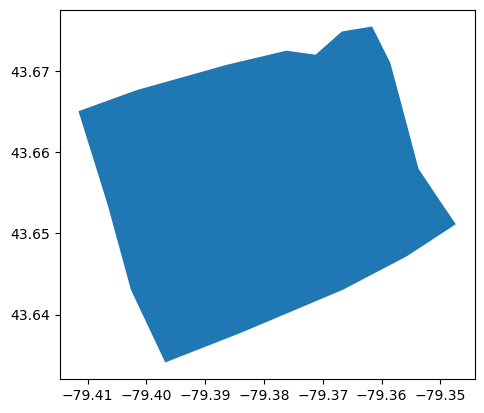

In [14]:
# Create and load the shape file for downtown toronto 
# Created and exported the shape file using this website: (https://geojson.io/#new&map=2/0/20)
gdf2 = gpd.read_file('downtown_toronto_shape.geojson')

# Plot the boundaries and check accuracy
gdf2.plot()

In [ ]:
# Filter listings for downtown Toronto using latitude, longitude coordinates (recommended for later step)
shapefile_path = "POLYGON.shx"
downtown_shapefile = gpd.read_file(shapefile_path)

df1['geometry'] = df1.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

gdf = gpd.GeoDataFrame(df1, geometry='geometry')

df1['is_downtown'] = gdf['geometry'].within(downtown_shapefile.union_all())
df1_downtown = df1[df1['is_downtown'] == True]

df1_downtown.head()

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,geometry,is_downtown
3,26654,Condo in Toronto · ★4.79 · 1 bedroom · 2 beds ...,113345,Waterfront Communities-The Island,43.646080,-79.390320,Entire home/apt,145.0,28,42,2023-09-01,0.27,5,51,2,POINT (-79.39032 43.64608),True
4,390395,Townhouse in Toronto · ★4.83 · 1 bedroom · 1 b...,1952926,Moss Park,43.656120,-79.360540,Private room,60.0,28,829,2022-10-22,5.81,1,62,0,POINT (-79.36054 43.65612),True
6,393873,Rental unit in Toronto · ★4.89 · 1 bedroom · 1...,1870492,Niagara,43.644550,-79.403120,Entire home/apt,115.0,183,21,2016-09-27,0.15,1,359,0,POINT (-79.40312 43.64455),True
9,401823,Rental unit in Toronto · ★4.71 · 1 bedroom · 1...,304551,Palmerston-Little Italy,43.660750,-79.409600,Entire home/apt,80.0,90,8,2021-12-31,0.06,9,346,0,POINT (-79.4096 43.66075),True
17,45399,Condo in Toronto · ★4.16 · Studio · 1 bed · 1 ...,195095,Bay Street Corridor,43.661230,-79.383360,Entire home/apt,146.0,28,86,2023-11-19,0.54,13,365,3,POINT (-79.38336 43.66123),True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19619,1037109136913590462,Rental unit in Toronto · ★5.0 · 2 bedrooms · 3...,23043792,Waterfront Communities-The Island,43.644128,-79.389406,Entire home/apt,400.0,1,5,2023-12-12,5.00,1,150,5,POINT (-79.38940579999999 43.6441277),True
19649,1037245253610293020,Rental unit in Toronto · ★New · 2 bedrooms · 3...,508210834,Waterfront Communities-The Island,43.639530,-79.396380,Entire home/apt,162.0,2,1,2023-12-07,1.00,1,261,1,POINT (-79.39638 43.63953),True
19715,1037812921921719979,Rental unit in Toronto · ★New · 1 bedroom · 1 ...,469271274,Bay Street Corridor,43.648460,-79.380520,Entire home/apt,106.0,1,2,2023-12-07,2.00,1,92,2,POINT (-79.38052 43.64846),True
19882,1038580811921358296,Home in Toronto · ★5.0 · 2 bedrooms · 3 beds ·...,105087986,Kensington-Chinatown,43.650000,-79.398650,Entire home/apt,170.0,2,2,2023-12-12,2.00,1,0,2,POINT (-79.39865 43.65),True


In [16]:
# Filter listings by number of reviews
# df = df[df['number_of_reviews_ltm'] > 0]
# df

In [17]:
# Multiply all numerical columns by 1 to remove leading apostrophes
numerical_columns = df1_downtown.select_dtypes(include=['int64', 'float64']).columns
df1_downtown.loc[:, numerical_columns] = df1_downtown[numerical_columns] * 1

numerical_columns = df2.select_dtypes(include=['int64', 'float64']).columns
df2.loc[:, numerical_columns] = df2[numerical_columns] * 1

numerical_columns = df3.select_dtypes(include=['int64', 'float64']).columns
df3.loc[:, numerical_columns] = df3[numerical_columns] * 1

In [18]:
# Remove dollar signs and potential commas from price
df3['corrected_price'] = df3['price'].str.replace(',', '')
df3['corrected_price'] = df3['corrected_price'].str.replace('$', '')
df3.head()

,listing_id,date,available,price,minimum_nights,maximum_nights,corrected_price
0,1419,2023-12-13,f,$469.00,28,730,469.00
1,1419,2023-12-14,f,$469.00,28,730,469.00
2,1419,2023-12-15,f,$469.00,28,730,469.00
3,1419,2023-12-16,f,$469.00,28,730,469.00
4,1419,2023-12-17,f,$469.00,28,730,469.00


In [19]:
# Convert price to float
df3['corrected_price'] = df3['corrected_price'].astype(float)

In [20]:
# Drop unneeded price column now
df3 = df3.drop('price', axis=1)

In [21]:
# !OPTIONAL! Will take a long time depending on number of rows (this is why we needed to filter by downtown Toronto)
# Use geopy to get zipcode from latitude and longitude
zipcodes = []
geolocator = Nominatim(user_agent="toronto-airbnbs")

for index, row in df1_downtown.iterrows():
    lat, lon = row['latitude'], row['longitude']
    location = geolocator.reverse((lat, lon), exactly_one=True, timeout=1.5)
    zip_code = location.raw["address"]["postcode"]
    zipcodes.append(zip_code)

df1_downtown.loc[:, 'zipcode'] = zipcodes
    
df1_downtown.head()

C:\Users\vietv\AppData\Local\Temp\ipykernel_7456\637132289.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_downtown.loc[:, 'zipcode'] = zipcodes


,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,geometry,is_downtown,zipcode
3,26654,Condo in Toronto · ★4.79 · 1 bedroom · 2 beds ...,113345,Waterfront Communities-The Island,43.646080,-79.390320,Entire home/apt,145.0,28,42,2023-09-01,0.27,5,51,2,POINT (-79.39032 43.64608),True,M5V 1H2
4,390395,Townhouse in Toronto · ★4.83 · 1 bedroom · 1 b...,1952926,Moss Park,43.656120,-79.360540,Private room,60.0,28,829,2022-10-22,5.81,1,62,0,POINT (-79.36054 43.65612),True,M5A 4G8
6,393873,Rental unit in Toronto · ★4.89 · 1 bedroom · 1...,1870492,Niagara,43.644550,-79.403120,Entire home/apt,115.0,183,21,2016-09-27,0.15,1,359,0,POINT (-79.40312 43.64455),True,M5V 0H7
9,401823,Rental unit in Toronto · ★4.71 · 1 bedroom · 1...,304551,Palmerston-Little Italy,43.660750,-79.409600,Entire home/apt,80.0,90,8,2021-12-31,0.06,9,346,0,POINT (-79.4096 43.66075),True,M5S 2R5
17,45399,Condo in Toronto · ★4.16 · Studio · 1 bed · 1 ...,195095,Bay Street Corridor,43.661230,-79.383360,Entire home/apt,146.0,28,86,2023-11-19,0.54,13,365,3,POINT (-79.38336 43.66123),True,M4Y 1X4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19619,1037109136913590462,Rental unit in Toronto · ★5.0 · 2 bedrooms · 3...,23043792,Waterfront Communities-The Island,43.644128,-79.389406,Entire home/apt,400.0,1,5,2023-12-12,5.00,1,150,5,POINT (-79.38940579999999 43.6441277),True,M5V 3A4
19649,1037245253610293020,Rental unit in Toronto · ★New · 2 bedrooms · 3...,508210834,Waterfront Communities-The Island,43.639530,-79.396380,Entire home/apt,162.0,2,1,2023-12-07,1.00,1,261,1,POINT (-79.39638 43.63953),True,M5V 4A6
19715,1037812921921719979,Rental unit in Toronto · ★New · 1 bedroom · 1 ...,469271274,Bay Street Corridor,43.648460,-79.380520,Entire home/apt,106.0,1,2,2023-12-07,2.00,1,92,2,POINT (-79.38052 43.64846),True,M5X 1E2
19882,1038580811921358296,Home in Toronto · ★5.0 · 2 bedrooms · 3 beds ·...,105087986,Kensington-Chinatown,43.650000,-79.398650,Entire home/apt,170.0,2,2,2023-12-12,2.00,1,0,2,POINT (-79.39865 43.65),True,M5T 2H1


In [22]:
# Add a new column for first three digits of postal code (Forward Sortation Area or FSA)

df1_downtown.loc[:, 'forward_sortation_area'] = df1_downtown['zipcode'].str[:3]
df1_downtown.head()

C:\Users\vietv\AppData\Local\Temp\ipykernel_7456\263070467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_downtown.loc[:, 'forward_sortation_area'] = df1_downtown['zipcode'].str[:3]


,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,geometry,is_downtown,zipcode,forward_sortation_area
3,26654,Condo in Toronto · ★4.79 · 1 bedroom · 2 beds ...,113345,Waterfront Communities-The Island,43.64608,-79.39032,Entire home/apt,145.0,28,42,2023-09-01,0.27,5,51,2,POINT (-79.39032 43.64608),True,M5V 1H2,M5V
4,390395,Townhouse in Toronto · ★4.83 · 1 bedroom · 1 b...,1952926,Moss Park,43.65612,-79.36054,Private room,60.0,28,829,2022-10-22,5.81,1,62,0,POINT (-79.36054 43.65612),True,M5A 4G8,M5A
6,393873,Rental unit in Toronto · ★4.89 · 1 bedroom · 1...,1870492,Niagara,43.64455,-79.40312,Entire home/apt,115.0,183,21,2016-09-27,0.15,1,359,0,POINT (-79.40312 43.64455),True,M5V 0H7,M5V
9,401823,Rental unit in Toronto · ★4.71 · 1 bedroom · 1...,304551,Palmerston-Little Italy,43.66075,-79.40960,Entire home/apt,80.0,90,8,2021-12-31,0.06,9,346,0,POINT (-79.4096 43.66075),True,M5S 2R5,M5S
17,45399,Condo in Toronto · ★4.16 · Studio · 1 bed · 1 ...,195095,Bay Street Corridor,43.66123,-79.38336,Entire home/apt,146.0,28,86,2023-11-19,0.54,13,365,3,POINT (-79.38336 43.66123),True,M4Y 1X4,M4Y


In [23]:
# Keep only 2024 data in calendar df3
df3 = df3[df3['date'].str[:4].astype(int) == 2024]
df3


,listing_id,date,available,minimum_nights,maximum_nights,corrected_price
19,1419,2024-01-01,f,28,730,469.0
20,1419,2024-01-02,f,28,730,469.0
21,1419,2024-01-03,f,28,730,469.0
22,1419,2024-01-04,f,28,730,469.0
23,1419,2024-01-05,f,28,730,469.0
...,...,...,...,...,...,...
7298360,1043819087763362442,2024-12-07,f,28,1125,276.0
7298361,1043819087763362442,2024-12-08,f,28,1125,276.0
7298362,1043819087763362442,2024-12-09,f,28,1125,276.0
7298363,1043819087763362442,2024-12-10,f,28,1125,276.0


In [24]:
# Randomly sample rows from the DataFrame
# df3_2024_sample = df3_2024.sample(n=1048575, random_state=42)


In [25]:
# After filtering by reviews in df1 (listings), id in df1 may not exist in calendar df3 
# if listing_id is not in df then remove it
df3 = df3[df3['listing_id'].isin(df1['id'])]


In [37]:
# Add country column to listings
df1_downtown.loc[:, 'Country'] = 'Canada'
df1_downtown

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,geometry,is_downtown,zipcode,forward_sortation_area,Country
3,26654,Condo in Toronto · ★4.79 · 1 bedroom · 2 beds ...,113345,Waterfront Communities-The Island,43.646080,-79.390320,Entire home/apt,145.0,28,42,2023-09-01,0.27,5,51,2,POINT (-79.39032 43.64608),True,M5V 1H2,M5V,Canada
4,390395,Townhouse in Toronto · ★4.83 · 1 bedroom · 1 b...,1952926,Moss Park,43.656120,-79.360540,Private room,60.0,28,829,2022-10-22,5.81,1,62,0,POINT (-79.36054 43.65612),True,M5A 4G8,M5A,Canada
6,393873,Rental unit in Toronto · ★4.89 · 1 bedroom · 1...,1870492,Niagara,43.644550,-79.403120,Entire home/apt,115.0,183,21,2016-09-27,0.15,1,359,0,POINT (-79.40312 43.64455),True,M5V 0H7,M5V,Canada
9,401823,Rental unit in Toronto · ★4.71 · 1 bedroom · 1...,304551,Palmerston-Little Italy,43.660750,-79.409600,Entire home/apt,80.0,90,8,2021-12-31,0.06,9,346,0,POINT (-79.4096 43.66075),True,M5S 2R5,M5S,Canada
17,45399,Condo in Toronto · ★4.16 · Studio · 1 bed · 1 ...,195095,Bay Street Corridor,43.661230,-79.383360,Entire home/apt,146.0,28,86,2023-11-19,0.54,13,365,3,POINT (-79.38336 43.66123),True,M4Y 1X4,M4Y,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19619,1037109136913590462,Rental unit in Toronto · ★5.0 · 2 bedrooms · 3...,23043792,Waterfront Communities-The Island,43.644128,-79.389406,Entire home/apt,400.0,1,5,2023-12-12,5.00,1,150,5,POINT (-79.38940579999999 43.6441277),True,M5V 3A4,M5V,Canada
19649,1037245253610293020,Rental unit in Toronto · ★New · 2 bedrooms · 3...,508210834,Waterfront Communities-The Island,43.639530,-79.396380,Entire home/apt,162.0,2,1,2023-12-07,1.00,1,261,1,POINT (-79.39638 43.63953),True,M5V 4A6,M5V,Canada
19715,1037812921921719979,Rental unit in Toronto · ★New · 1 bedroom · 1 ...,469271274,Bay Street Corridor,43.648460,-79.380520,Entire home/apt,106.0,1,2,2023-12-07,2.00,1,92,2,POINT (-79.38052 43.64846),True,M5X 1E2,M5X,Canada
19882,1038580811921358296,Home in Toronto · ★5.0 · 2 bedrooms · 3 beds ·...,105087986,Kensington-Chinatown,43.650000,-79.398650,Entire home/apt,170.0,2,2,2023-12-12,2.00,1,0,2,POINT (-79.39865 43.65),True,M5T 2H1,M5T,Canada


In [27]:
# Save modified excel files or save as separate csvs if the file is too large

# df.to_csv('listings-modified.csv', index=False)
# df2.to_csv('reviews-modified.csv', index=False)
# df3_2024.to_csv('calendar-modified.csv', index=False)

with pd.ExcelWriter('combined_airbnb_data_2023_dec.xlsx', engine='openpyxl') as writer:
    df1_downtown.to_excel(writer, sheet_name='Listings', index=False)
    df2.to_excel(writer, sheet_name='Reviews', index=False)
    df3.to_excel(writer, sheet_name='Calendar', index=False)

ValueError: This sheet is too large! Your sheet size is: 4990586, 6 Max sheet size is: 1048576, 16384